In [6]:
import torch
from torch import (optim, nn)

import numpy as np

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [7]:
def hinge(y, t):
    return np.maximum(0, 1 - t * y)

In [8]:
t = np.arange(0, 10, 100, dtype=np.float32)
y = 2 * t - .8

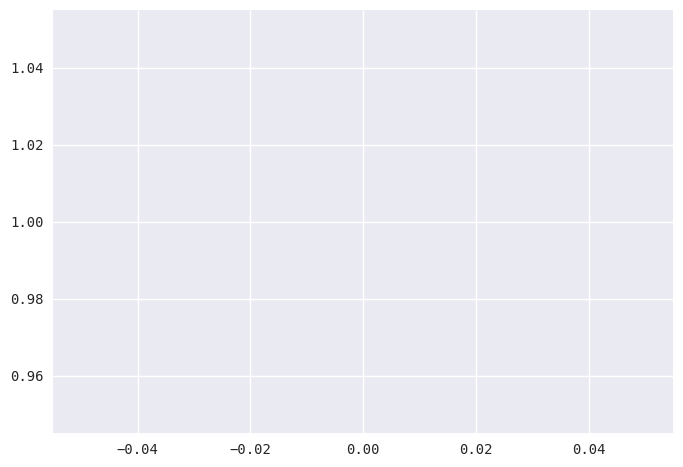